<a href="https://colab.research.google.com/github/amarildo86/datascience/blob/master/Hackathon_Digio_Financial_Data_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings(action='ignore')

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
!ls  '/content/drive/MyDrive/digio_hackathon'

clientes.csv  ml_predictions.csv  transacional.csv


In [7]:
clientes = pd.read_csv("drive/MyDrive/digio_hackathon/clientes.csv", sep=';')
transacional = pd.read_csv("drive/MyDrive/digio_hackathon/transacional.csv", sep=';')
ml_predictions = pd.read_csv("drive/MyDrive/digio_hackathon/ml_predictions.csv", sep=';')

### EDA - Exploratory Data Analysis
### 1 - Base clientes

In [106]:
clientes.head(3)

,safra,uf,nascimento,genero_biologico,renda_presumida,renda_declarada,limite_maximo,limite_global,reg_metropolitana,sistema_operacional,operadora_tim,operadora_claro,operadora_oi,operadora_vivo,operadora_nextel,operadora_others,id
0,201706,AL,1993-06-06,M,1200.0,1800.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1844674417714159308
1,201702,MT,1993-11-23,M,750.0,1444.0,750.0,750.0,NaN,iOS,0.0,1.0,0.0,0.0,0.0,0.0,691752913106883469
2,201703,MG,1991-04-12,M,4750.0,1000.0,11050.0,10050.0,1.0,ANDROID,0.0,0.0,1.0,0.0,0.0,0.0,461168608765220513


In [107]:
clientes.describe()

,safra,renda_presumida,renda_declarada,limite_maximo,limite_global,reg_metropolitana,operadora_tim,operadora_claro,operadora_oi,operadora_vivo,operadora_nextel,operadora_others,id
count,335272.000000,335272.000000,335272.000000,335270.000000,335272.000000,291196.000000,260599.000000,260599.000000,260599.000000,260599.000000,260599.000000,260599.000000,3.352720e+05
mean,201835.363171,2369.221119,3144.904060,3100.064497,2617.487431,0.508434,0.246632,0.277008,0.150875,0.344314,0.001040,0.049854,1.037074e+18
std,67.870258,3147.524118,6012.253419,4553.816025,3756.625824,0.499930,0.431051,0.447521,0.357928,0.475145,0.032231,0.217644,6.623365e+17
min,201701.000000,0.010000,300.000000,0.000000,-319.410000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.026340e+05
25%,201804.000000,1000.000000,1500.000000,900.000000,800.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.611686e+17
50%,201811.000000,1600.000000,2200.000000,1400.000000,1300.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.223373e+17
75%,201905.000000,2920.000000,3500.000000,3200.000000,2800.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.614090e+18
max,201912.000000,900000.000000,999999.990000,30000.000000,30000.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.075259e+18


In [108]:
clientes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 335272 entries, 0 to 335271
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   safra                335272 non-null  int64  
 1   uf                   335255 non-null  object 
 2   nascimento           335272 non-null  object 
 3   genero_biologico     335272 non-null  object 
 4   renda_presumida      335272 non-null  float64
 5   renda_declarada      335272 non-null  float64
 6   limite_maximo        335270 non-null  float64
 7   limite_global        335272 non-null  float64
 8   reg_metropolitana    291196 non-null  float64
 9   sistema_operacional  270767 non-null  object 
 10  operadora_tim        260599 non-null  float64
 11  operadora_claro      260599 non-null  float64
 12  operadora_oi         260599 non-null  float64
 13  operadora_vivo       260599 non-null  float64
 14  operadora_nextel     260599 non-null  float64
 15  operadora_others 

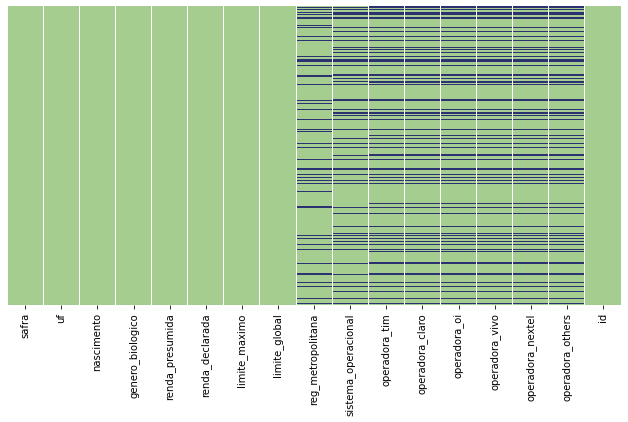

In [109]:
plt.figure(figsize=(11, 5.5))
sns.heatmap(clientes.isnull(), yticklabels=False, cbar=False, cmap='crest')

In [110]:
clientes.isnull().sum().sort_values(ascending=False)

operadora_nextel       74673
operadora_vivo         74673
operadora_oi           74673
operadora_claro        74673
operadora_tim          74673
operadora_others       74673
sistema_operacional    64505
reg_metropolitana      44076
uf                        17
limite_maximo              2
genero_biologico           0
nascimento                 0
id                         0
renda_presumida            0
renda_declarada            0
limite_global              0
safra                      0
dtype: int64

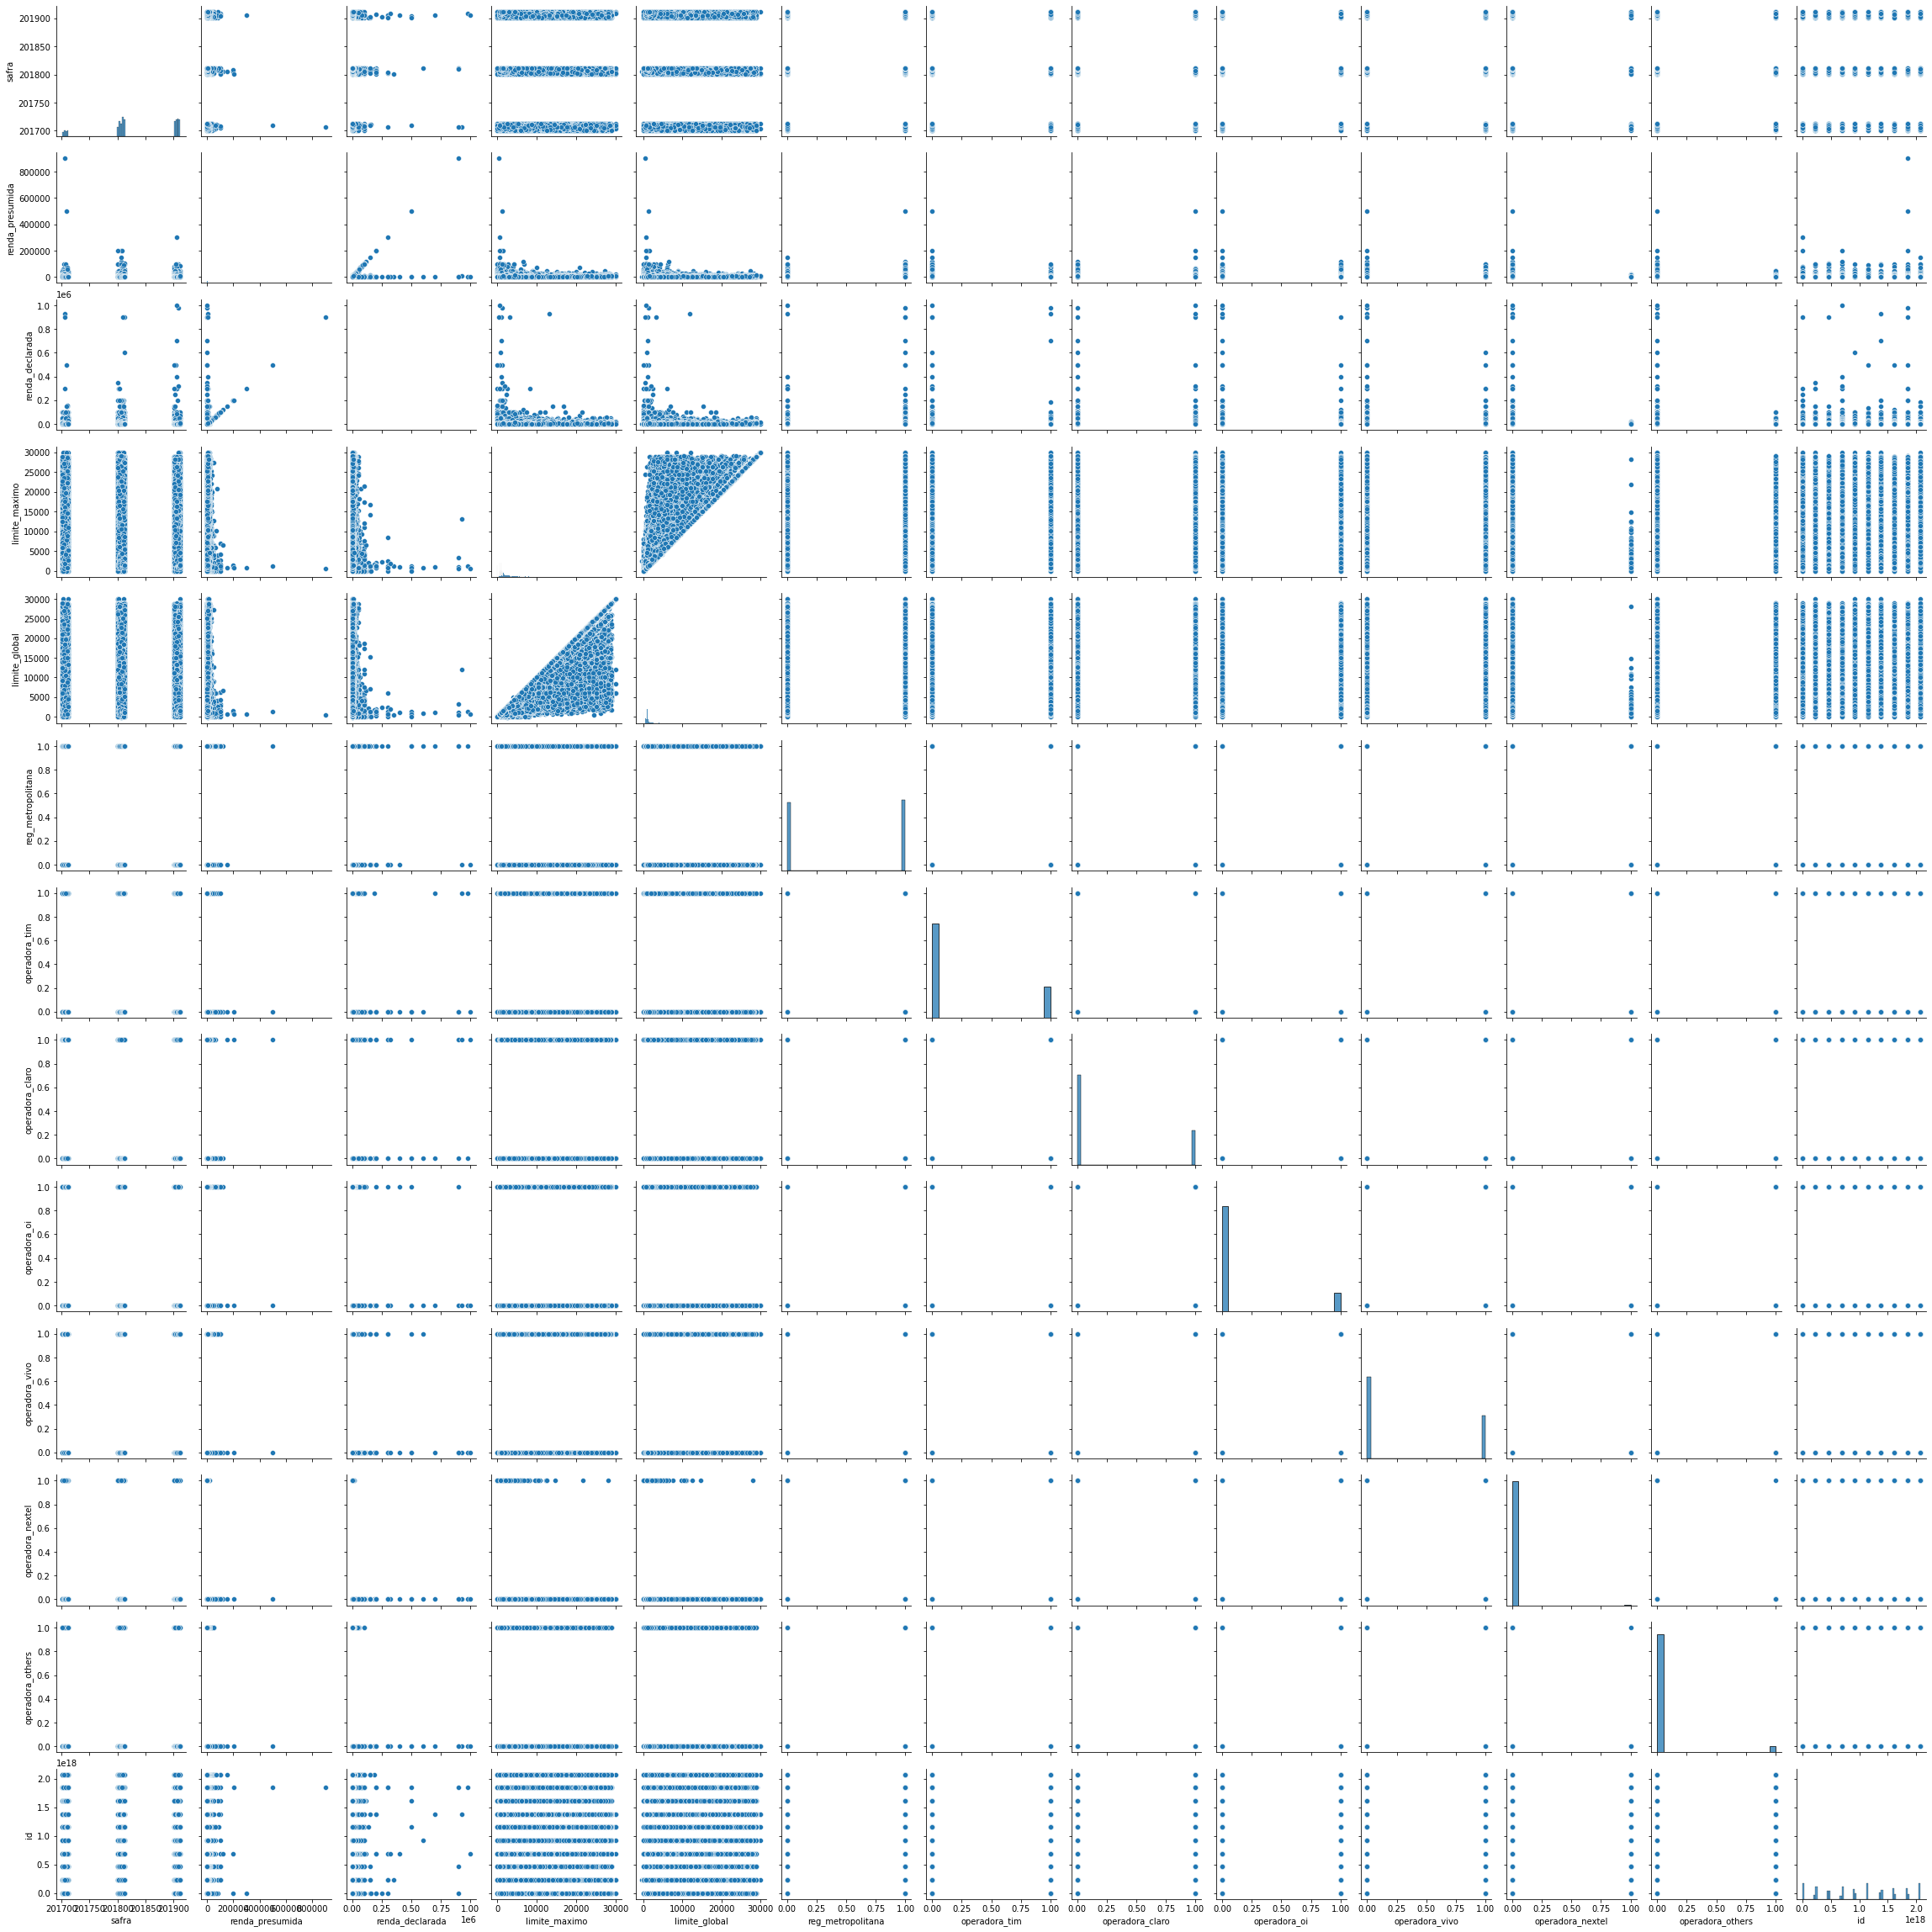

In [ ]:
sns.pairplot(clientes)

#### Outliers

#### 2 - Base Transacional

In [111]:
transacional.head(5)

,periodo,mob,spending,n_transacoes,max_atraso_mes,taxa_ocupacao_limite,flag_parcelamento_fatura,valor_fatura,custo_aquisicao,custo_manutencao,receita_spread,custo_perda_liquida,receita_servicos,custo_impostos,id
0,201905,1,0.0,0,0,0.00,0,0.0,56.4165,6.3,-0.060178,0.00,0.0,-0.002798,227261
1,201906,2,0.0,0,0,0.59,0,10.0,0.0000,6.3,0.000000,0.00,0.0,0.000000,227261
2,201907,3,0.0,0,0,0.00,0,10.0,0.0000,6.3,0.000000,-0.05,0.0,0.000000,227261
3,201908,4,0.0,0,0,0.00,0,10.0,0.0000,6.3,0.000000,0.00,0.0,0.000000,227261
4,201909,5,0.0,0,0,0.00,0,10.0,0.0000,6.3,0.000000,0.00,0.0,0.000000,227261


In [112]:
transacional.describe()

,periodo,mob,spending,n_transacoes,max_atraso_mes,taxa_ocupacao_limite,flag_parcelamento_fatura,valor_fatura,custo_aquisicao,custo_manutencao,receita_spread,custo_perda_liquida,receita_servicos,custo_impostos,id
count,4.923032e+06,4.923032e+06,4.923032e+06,4.923032e+06,4.923032e+06,4903383.00,4923032.0,4.923032e+06,4.923014e+06,4.922584e+06,4.923032e+06,4.923032e+06,4.923032e+06,4.923032e+06,4.923032e+06
mean,2.018678e+05,1.041800e+01,3.631643e+02,4.811355e+00,1.411973e+01,NaN,0.0,5.002553e+02,3.842511e+00,6.300000e+00,1.131861e+01,1.191289e+01,5.086590e+00,8.645736e-01,1.037587e+18
std,5.849365e+01,7.412252e+00,5.644675e+02,7.239867e+00,7.155289e+01,NaN,0.0,5.641806e+02,1.421324e+01,5.079608e-10,3.930026e+01,1.238747e+02,7.553412e+00,1.891984e+00,6.623815e+17
min,2.017010e+05,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-inf,0.0,0.000000e+00,0.000000e+00,6.300000e+00,-2.726644e+03,-2.185427e+04,-1.685873e+01,-1.249796e+02,1.026340e+05
25%,2.018100e+05,4.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,20.38,0.0,1.557500e+02,0.000000e+00,6.300000e+00,-8.989822e-01,-8.400000e-01,0.000000e+00,0.000000e+00,4.611686e+17
50%,2.019040e+05,9.000000e+00,1.711000e+02,2.000000e+00,0.000000e+00,59.86,0.0,3.529100e+02,0.000000e+00,6.300000e+00,1.293278e-01,0.000000e+00,2.578139e+00,2.994330e-01,1.152922e+18
75%,2.019090e+05,1.500000e+01,5.203900e+02,7.000000e+00,0.000000e+00,95.48,0.0,6.566300e+02,0.000000e+00,6.300000e+00,3.929973e+00,1.640000e+00,7.407868e+00,9.372337e-01,1.614090e+18
max,2.019120e+05,8.800000e+01,8.176236e+04,3.490000e+02,1.047000e+03,inf,0.0,2.195913e+04,5.641650e+01,6.300000e+00,2.389470e+03,1.235535e+04,1.172444e+03,1.131614e+02,2.075259e+18


In [113]:
transacional.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4923032 entries, 0 to 4923031
Data columns (total 15 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   periodo                   int64  
 1   mob                       int64  
 2   spending                  float64
 3   n_transacoes              int64  
 4   max_atraso_mes            int64  
 5   taxa_ocupacao_limite      float64
 6   flag_parcelamento_fatura  int64  
 7   valor_fatura              float64
 8   custo_aquisicao           float64
 9   custo_manutencao          float64
 10  receita_spread            float64
 11  custo_perda_liquida       float64
 12  receita_servicos          float64
 13  custo_impostos            float64
 14  id                        int64  
dtypes: float64(9), int64(6)
memory usage: 563.4 MB


In [114]:
transacional.isnull().sum().sort_values(ascending=False)

taxa_ocupacao_limite        19649
custo_manutencao              448
custo_aquisicao                18
id                              0
custo_impostos                  0
receita_servicos                0
custo_perda_liquida             0
receita_spread                  0
valor_fatura                    0
flag_parcelamento_fatura        0
max_atraso_mes                  0
n_transacoes                    0
spending                        0
mob                             0
periodo                         0
dtype: int64

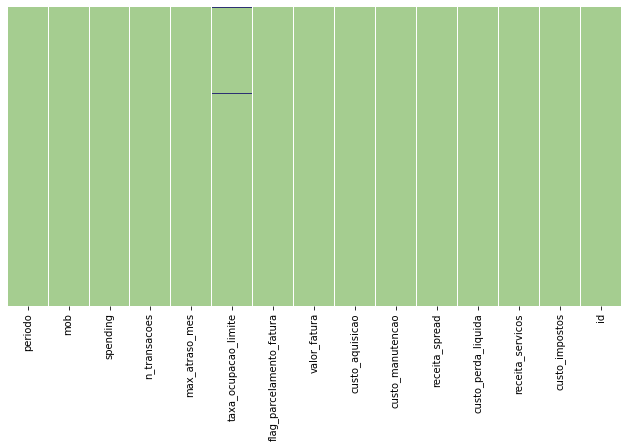

In [ ]:
plt.figure(figsize=(11, 5.5))
sns.heatmap(transacional.isnull(), yticklabels=False, cbar=False, cmap='crest')

In [ ]:
sns.pairplot(transacional)

### Data preparation
#### Base clientes

In [115]:
clientes['nascimento'] = pd.to_datetime(clientes['nascimento'])
clientes['year'] , clientes['month']  = clientes['nascimento'] .dt.year, clientes['nascimento'] .dt.month
clientes['safra2']=(clientes['safra']/100).astype(int)

clientes['age']=clientes['safra2']-clientes['year']
clientes['sexo_m']=np.where(clientes['genero_biologico']=="M",1,0)
clientes['sexo_F']=np.where(clientes['genero_biologico']=="F",1,0)

clientes['reg_metropolitana_1']=np.where(clientes['reg_metropolitana']==1,1,0)
clientes['reg_metropolitana_0']=np.where(clientes['reg_metropolitana']==0,1,0)

clientes['sistema_operacional_iOS']=np.where(clientes['sistema_operacional']=='iOS',1,0)
clientes['sistema_operacional_and']=np.where(clientes['sistema_operacional']=='ANDROID',1,0)

clientes['operadora_tim_1']=np.where(clientes['operadora_tim']==1,1,0)
clientes['operadora_tim_0']=np.where(clientes['operadora_tim']==0,1,0)

clientes['operadora_claro_1']=np.where(clientes['operadora_claro']==1,1,0)
clientes['operadora_claro_0']=np.where(clientes['operadora_claro']==0,1,0)

clientes.head(3)

,safra,uf,nascimento,genero_biologico,renda_presumida,renda_declarada,limite_maximo,limite_global,reg_metropolitana,sistema_operacional,operadora_tim,operadora_claro,operadora_oi,operadora_vivo,operadora_nextel,operadora_others,id,year,month,safra2,age,sexo_m,sexo_F,reg_metropolitana_1,reg_metropolitana_0,sistema_operacional_iOS,sistema_operacional_and,operadora_tim_1,operadora_tim_0,operadora_claro_1,operadora_claro_0
0,201706,AL,1993-06-06,M,1200.0,1800.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1844674417714159308,1993,6,2017,24,1,0,1,0,0,0,0,0,0,0
1,201702,MT,1993-11-23,M,750.0,1444.0,750.0,750.0,NaN,iOS,0.0,1.0,0.0,0.0,0.0,0.0,691752913106883469,1993,11,2017,24,1,0,0,0,1,0,0,1,1,0
2,201703,MG,1991-04-12,M,4750.0,1000.0,11050.0,10050.0,1.0,ANDROID,0.0,0.0,1.0,0.0,0.0,0.0,461168608765220513,1991,4,2017,26,1,0,1,0,0,1,0,1,0,1


#### Base Transacional

In [8]:
#margem_operacional
#margem_operacional = [(a - b) + c - d] - e - f

a = transacional['receita_spread']
b = transacional['custo_perda_liquida']
c = transacional['receita_servicos']
d = transacional['custo_impostos']
e = transacional['custo_aquisicao']
f = transacional['custo_manutencao']

transacional['mar_oper_trans'] = ((a-b) + c - d) - e - f
transacional['mar_oper_trans'].head(3)


#custo imposto
transacional['cus_impos_cal'] = (transacional['receita_spread'] * .045 + transacional['receita_servicos'] * .065)

In [9]:
transacional_clean = transacional.dropna()
transacional_clean.isnull().sum().sort_values(ascending=False)

cus_impos_cal               0
valor_fatura                0
mob                         0
spending                    0
n_transacoes                0
max_atraso_mes              0
taxa_ocupacao_limite        0
flag_parcelamento_fatura    0
custo_aquisicao             0
mar_oper_trans              0
custo_manutencao            0
receita_spread              0
custo_perda_liquida         0
receita_servicos            0
custo_impostos              0
id                          0
periodo                     0
dtype: int64

### Evolução das Linhas da DRE  ao longo das safras
####  Margem Operacional

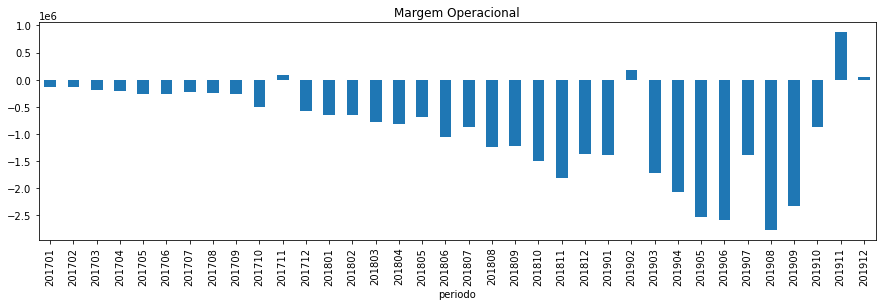

In [118]:
transacional.groupby(['periodo'])['mar_oper_trans'].sum().plot(kind='bar', figsize=(15, 4), title="Margem Operacional")

####  Spending

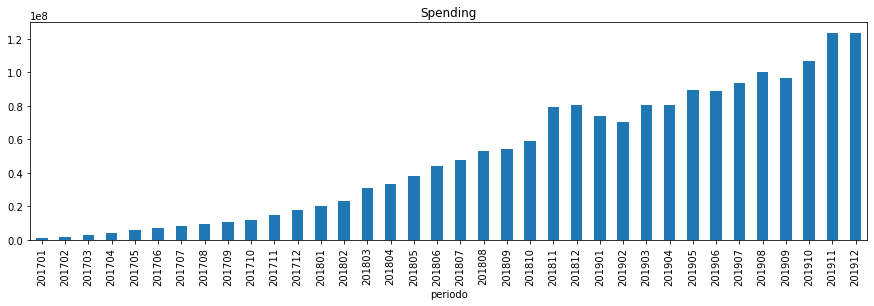

In [119]:
transacional.groupby(['periodo'])['spending'].sum().plot(kind='bar', figsize=(15, 4), title="Spending")

####  Custo de aquisição

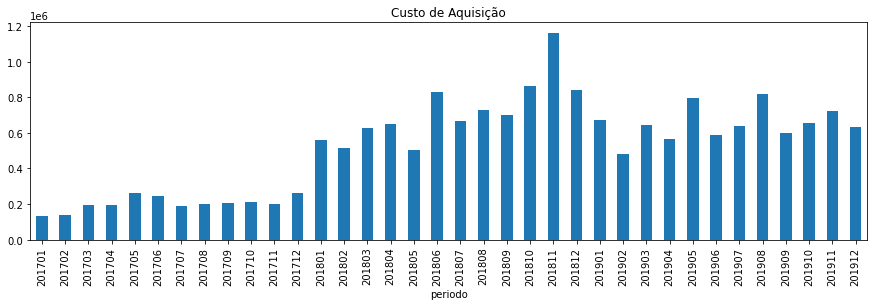

In [120]:
transacional.groupby(['periodo'])['custo_aquisicao'].sum().plot(kind='bar', figsize=(15, 4), title="Custo de Aquisição")

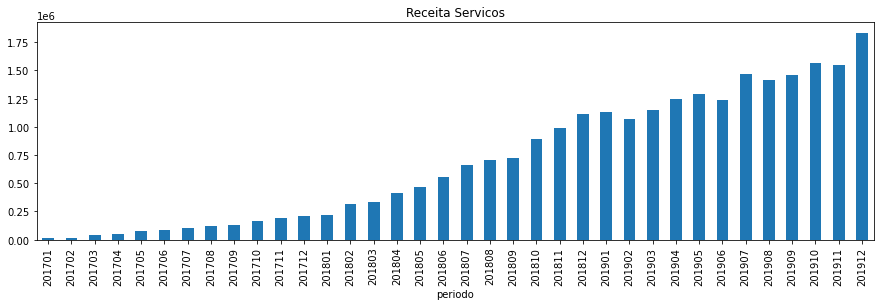

In [121]:
transacional.groupby(['periodo'])['receita_servicos'].sum().plot(kind='bar', figsize=(15, 4), title="Receita Servicos")

####  Receita Spread

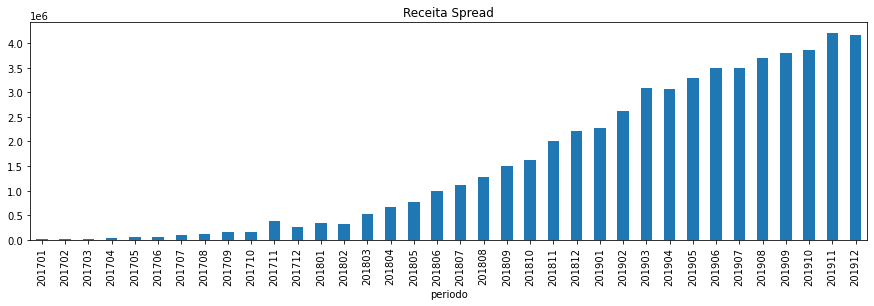

In [122]:
transacional.groupby(['periodo'])['receita_spread'].sum().plot(kind='bar', figsize=(15, 4), title="Receita Spread")

####  Número de Transações

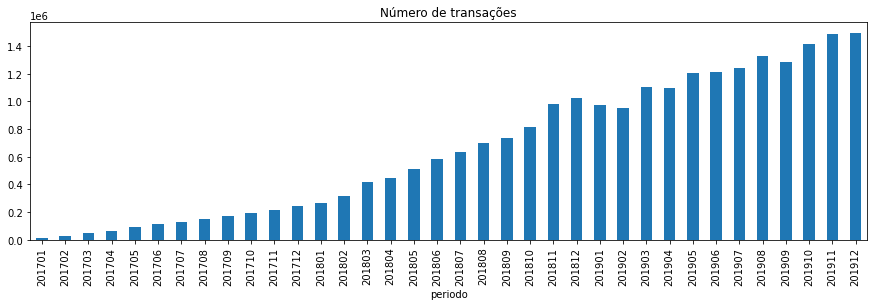

In [123]:
transacional.groupby(['periodo'])['n_transacoes'].sum().plot(kind='bar', figsize=(15, 4), title="Número de transações")

####  Valor da Fatura

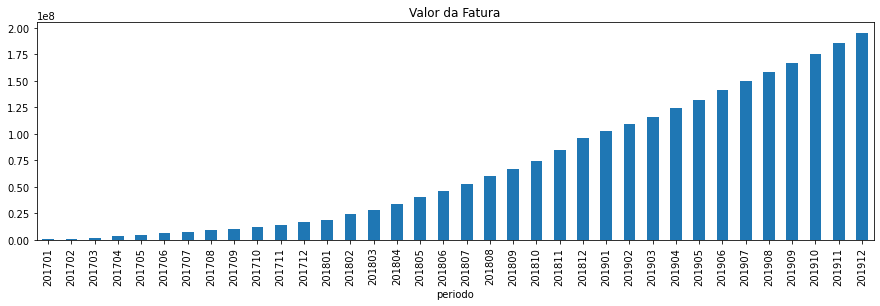

In [124]:
transacional.groupby(['periodo'])['valor_fatura'].sum().plot(kind='bar', figsize=(15, 4), title="Valor da Fatura")

####  Número de Clientes

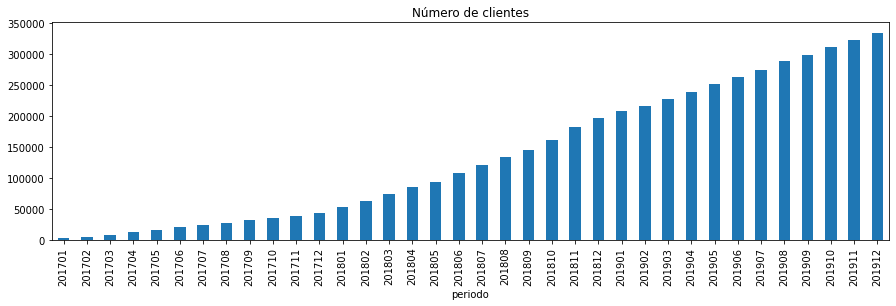

In [125]:
transacional.groupby(['periodo'])['id'].nunique().plot(kind='bar', figsize=(15, 4), title="Número de clientes")

####  Custo dos impostos

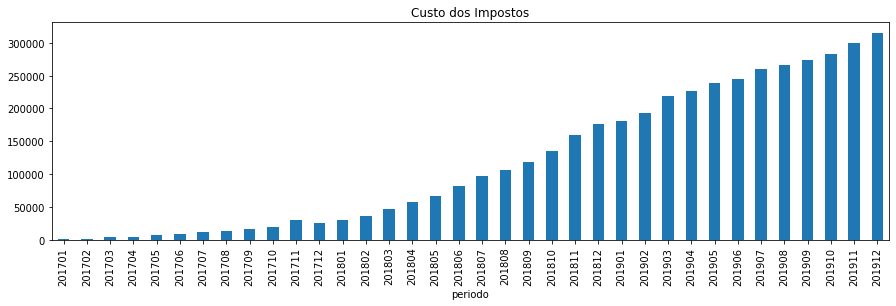

In [126]:
transacional.groupby(['periodo'])['custo_impostos'].sum().plot(kind='bar', figsize=(15, 4), title="Custo dos Impostos")

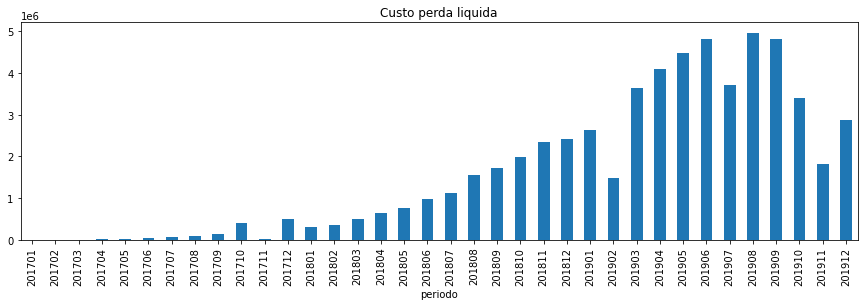

In [127]:
transacional.groupby(['periodo'])['custo_perda_liquida'].sum().plot(kind='bar', figsize=(15, 4), title="Custo perda liquida")

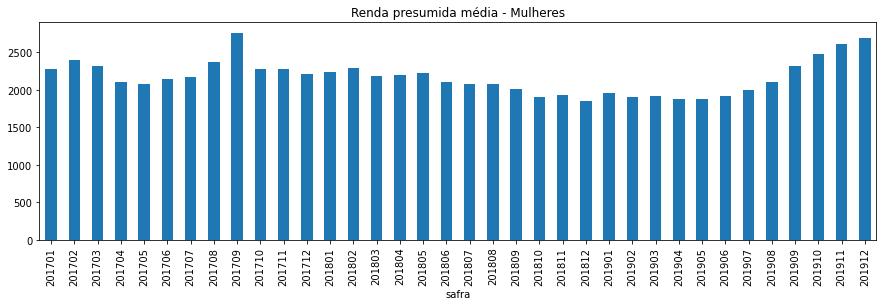

In [128]:
renda_med_mulher = clientes.loc[(clientes.genero_biologico == 'F')].groupby(['safra'])['renda_presumida'].mean()
renda_med_mulher.plot(kind='bar', figsize=(15, 4), title="Renda presumida média - Mulheres")

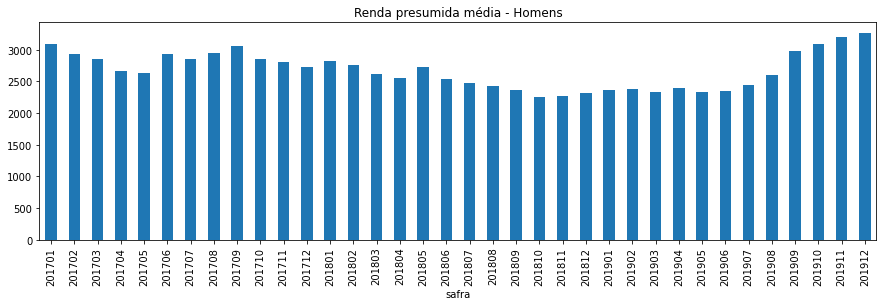

In [129]:
renda_med_mulher = clientes.loc[(clientes.genero_biologico == 'M')].groupby(['safra'])['renda_presumida'].mean()
renda_med_mulher.plot(kind='bar', figsize=(15, 4), title="Renda presumida média - Homens")

In [132]:
ml_predictions.head(3)

,id,periodo,receita_spread,custo_perda_liquida,receita_servicos,custo_impostos,custos,margem_operacional
0,102634,202001,0,0,0,0,0,0
1,102634,202002,0,0,0,0,0,0
2,102634,202003,0,0,0,0,0,0


In [133]:
transacional_clean = transacional.dropna()
transacional_clean.shape

(4902935, 17)

### Previsão


In [10]:
ts_rspread = transacional.loc[:, ['id', 'periodo', 'receita_spread']]
ts_rspread_mean = pd.DataFrame(ts_rspread.groupby(['periodo'])['receita_spread'].sum() / 335272)
ts_rspread_fill = ts_rspread_mean.merge(ts_rspread, on='periodo', how='inner')

ts_cpl = transacional.loc[:, ['id', 'periodo', 'custo_perda_liquida']]
ts_cpl_mean = pd.DataFrame(ts_cpl.groupby(['periodo'])['custo_perda_liquida'].sum() / 335272)
ts_cpl_fill = ts_cpl_mean.merge(ts_rspread, on='periodo', how='inner')

ts_rs = transacional.loc[:, ['id', 'periodo', 'receita_servicos']]
ts_rs_mean = pd.DataFrame(ts_rs.groupby(['periodo'])['receita_servicos'].sum() / 335272)
ts_rs_fill = ts_rs_mean.merge(ts_rspread, on='periodo', how='inner')

ts_ci = transacional.loc[:, ['id', 'periodo', 'custo_impostos']]
ts_ci_mean = pd.DataFrame(ts_ci.groupby(['periodo'])['custo_impostos'].sum() / 335272)
ts_ci_fill = ts_ci_mean.merge(ts_rspread, on='periodo', how='inner')

ts_custos = transacional.loc[:, ['id', 'periodo', 'custo_perda_liquida', 'custo_impostos', 'custo_aquisicao']]
ts_custos['custos_mean'] = ts_custos['custo_perda_liquida'] + ts_custos['custo_impostos'] + ts_custos['custo_aquisicao'] + 6.3
ts_custos_mean = pd.DataFrame(ts_custos.groupby(['periodo'])['custos_mean'].sum() / 335272)
ts_custos_fill = ts_custos_mean.merge(ts_rspread, on='periodo', how='inner')

ts_mar_oper = transacional.loc[:, ['id', 'periodo', 'mar_oper_trans']]
ts_mar_oper_mean = pd.DataFrame(ts_mar_oper.groupby(['periodo'])['mar_oper_trans'].sum() / 335272)
ts_mar_oper_fill = ts_mar_oper_mean.merge(ts_rspread, on='periodo', how='inner')

In [12]:
DRE = pd.DataFrame()
DRE['id'] = ts_rspread['id']
DRE['periodo'] = ts_rspread['periodo']
DRE['receita_spread'] = ts_rspread_fill['receita_spread_x']
DRE['custo_perda_liquida'] = ts_cpl_fill['custo_perda_liquida']
DRE['receita_servicos'] = ts_rs_fill['receita_servicos']
DRE['custo_impostos'] = ts_ci_fill['custo_impostos']
DRE['custos'] = ts_custos_fill['custos_mean']
DRE['margem_operacional'] = ts_mar_oper_fill['mar_oper_trans']

print(DRE.shape)
DRE.head(3)

(4923032, 8)


,id,periodo,receita_spread,custo_perda_liquida,receita_servicos,custo_impostos,custos,margem_operacional
0,227261,201905,0.020883,0.000004,0.038034,0.0035,0.448524,-0.389606
1,227261,201906,0.020883,0.000004,0.038034,0.0035,0.448524,-0.389606
2,227261,201907,0.020883,0.000004,0.038034,0.0035,0.448524,-0.389606


In [13]:
predictions = ml_predictions.copy()

predictions['id'] = ts_rspread['id']
predictions['periodo'] = ts_rspread['periodo']
predictions['receita_spread'] = DRE['receita_spread']*1.08
predictions['custo_perda_liquida'] = DRE['custo_perda_liquida']*1.015
predictions['receita_servicos'] = DRE['receita_servicos']*1.10
predictions['custo_impostos'] = DRE['custo_impostos']*1.005
predictions['custos'] = DRE['custos']*1.005
predictions['margem_operacional'] = DRE['margem_operacional']*(-1)*1.05

print(predictions.shape)
predictions.head()

(20116932, 8)


,id,periodo,receita_spread,custo_perda_liquida,receita_servicos,custo_impostos,custos,margem_operacional
0,227261.0,201905.0,0.022554,0.000004,0.041837,0.003518,0.450767,0.409087
1,227261.0,201906.0,0.022554,0.000004,0.041837,0.003518,0.450767,0.409087
2,227261.0,201907.0,0.022554,0.000004,0.041837,0.003518,0.450767,0.409087
3,227261.0,201908.0,0.022554,0.000004,0.041837,0.003518,0.450767,0.409087
4,227261.0,201909.0,0.022554,0.000004,0.041837,0.003518,0.450767,0.409087


In [16]:
predictions.to_csv("drive/MyDrive/digio_hackathon/ml_pred_entrega.csv")